<a href="https://colab.research.google.com/github/inthyes/ML-Study/blob/main/Linear_regression(numpy%2C_sklearn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Basic setting
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Optimization of Linear Regression

In [11]:
# Load the dataset
with open('./linear_regression.pickle', 'rb') as f:
    X, y = pickle.load(f)

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


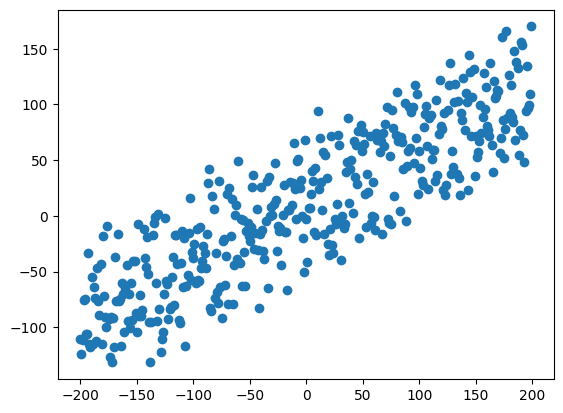

In [6]:
# Check the dataset distribution
plt.scatter(X, y)
plt.show()

## [P.1] 데이터를 학습 데이터와 평가 데이터로 나누기

In [7]:
# Use sklearn library
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

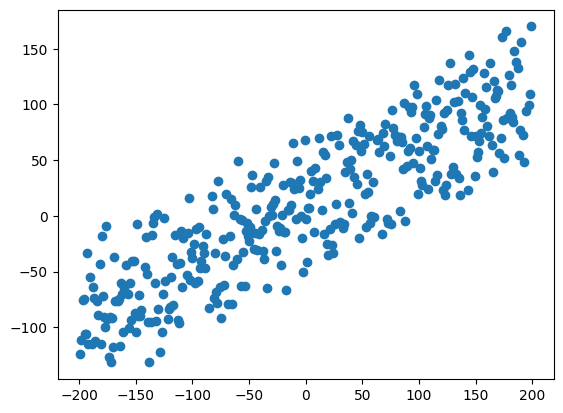

In [9]:
# Visualize train dataset
plt.scatter(X_train, y_train)
plt.show()

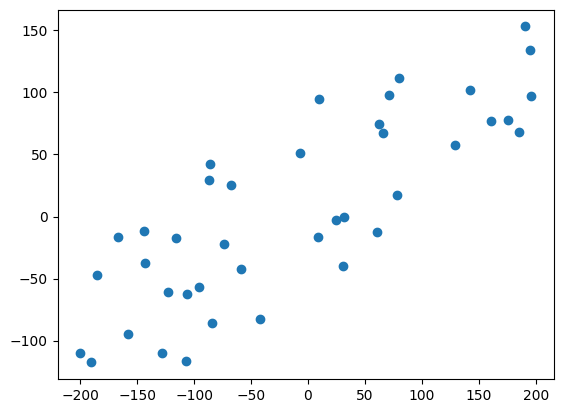

In [13]:
# Visualize train dataset
plt.scatter(X_test, y_test)
plt.show()

## [P.2] <font color=red>numpy</font> 라이브러리를 활용해, 최적의 선형 회귀 모델 찾기

- 최적의 모델은 모든 데이터에 대해 실제값과 예측값의 차이가 제일 작은 모델
- 선형 회귀 모델은  일반적으로 <font color=red>MSE(Mean Squared Error)</font> 손실을 최소화하도록 학습
- 손실 함수와 모델 파라미터의 gradient에 관한 빈칸 부분 채워넣기

**MSE 손실 함수**
\begin{equation*}
\left( \frac{1}{n} \sum_{i=1}^n (y_i - (wX_i + b))^2 \right)
\end{equation*}

**Gradients 계산**
\begin{equation*}
\frac{\partial L}{\partial w} = -2 * \frac{1}{n} \sum_{i=1}^n ((y_i - (wX_i + b)) * X_i)
\end{equation*}

\begin{equation*}
\frac{\partial L}{\partial b} = -2 * \frac{1}{n} \sum_{i=1}^n (y_i - (wX_i + b))
\end{equation*}

In [39]:
def gd_numpy(X, y, epochs, lr): #lr : 학습률
    # Model weights and bias parameters 초기화
    w = 0.0
    b = 0.0

    # Store model parameters and loss for visualization
    w_list, b_list, loss_list = [], [], []

    # Perform Gradient Descent
    for i in range(epochs):


    #################################################
    ######## Hint: use +, -, *, /, **, np.mean() ########
        loss = np.mean((y - (w * X + b))**2)   # MSE loss

        # 편미분값
        dw = -2 * np.mean(y - ((w * X + b)) * X)   # derivative w.r.t to w
        db = -2 * np.mean(y - (w * X + b))   # derivative w.r.t to b
    #################################################

        # 미분의 반대방향으로 이동하는 것 표현
        w = w - dw * lr   # update w / 학습률 lr를 곱함으로서 값의 크기 조절
        b = b - db * lr   # update b

        w_list.append(w)
        b_list.append(b)
        loss_list.append(loss)

    print('Trained model weights : %.4f' % w)
    print('Trained model bias : %.4f' % b)

    return w, b, w_list, b_list, loss_list

In [64]:
# Training setting
epochs = 1000
learning_rate = 1e-7 # 10의 -7승

w, b, w_list, b_list, loss_list = gd_numpy(X_train, y_train, epochs, learning_rate)



Trained model weights : 0.0007
Trained model bias : 0.0021


In [62]:
# get train loss

y_pred = w * X_train + b

train_loss = np.mean((y_train - y_pred)**2)
print('Train Loss for LinearRegression model : %.4f' % train_loss)

Train Loss for LinearRegression model : 4764.5179


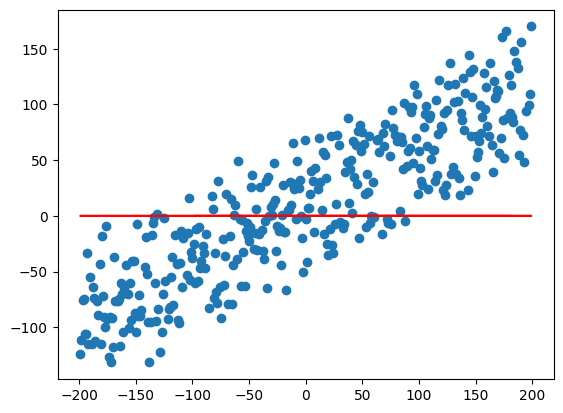

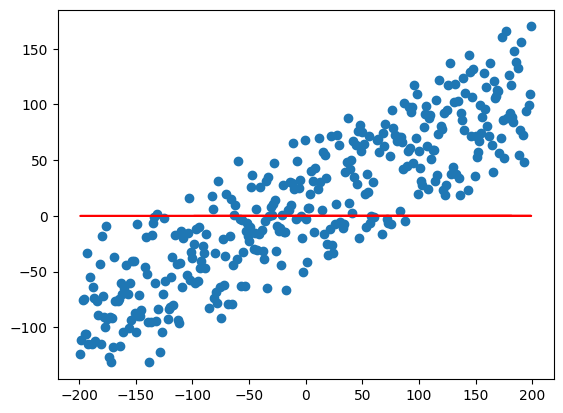

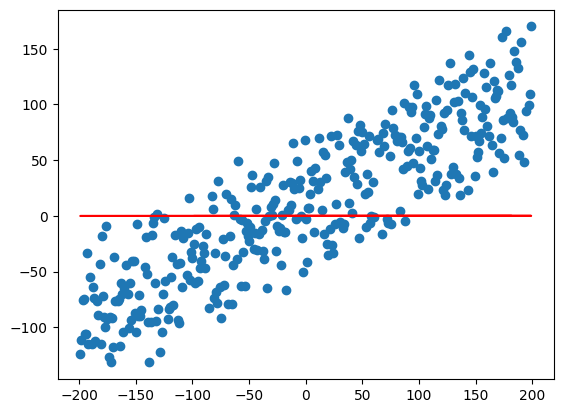

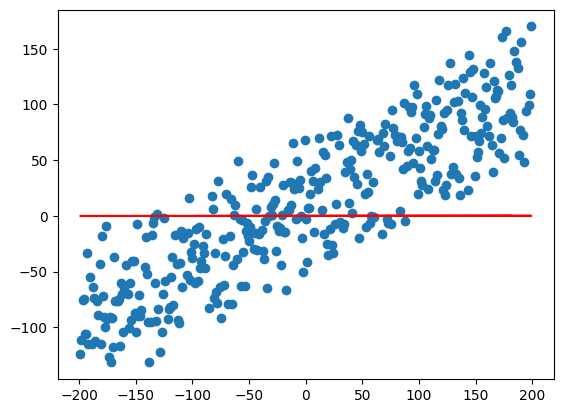

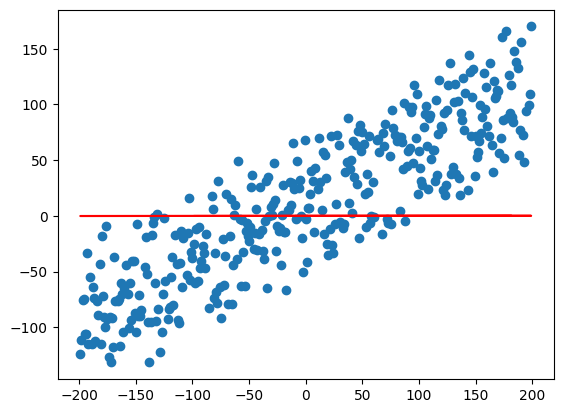

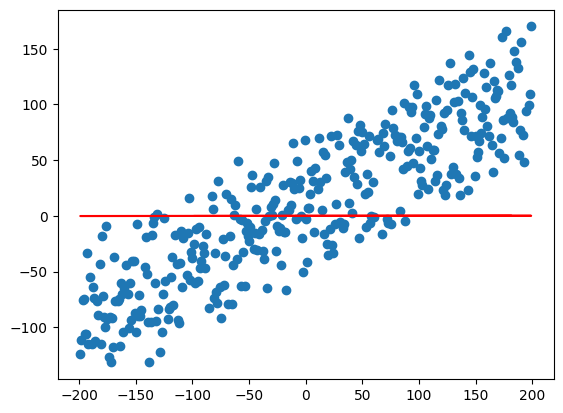

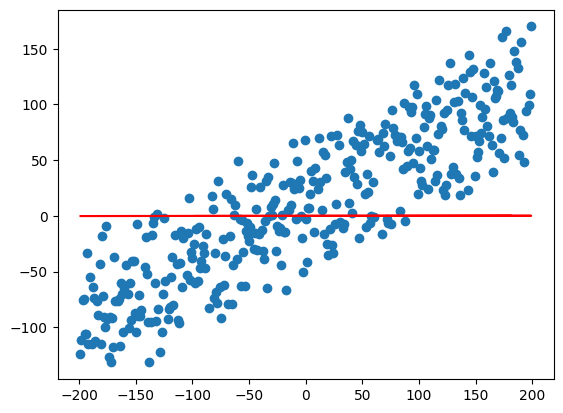

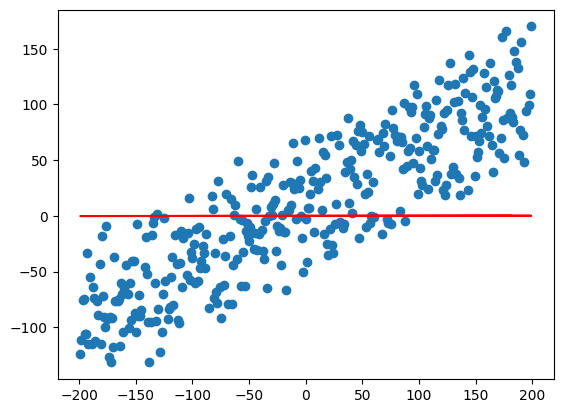

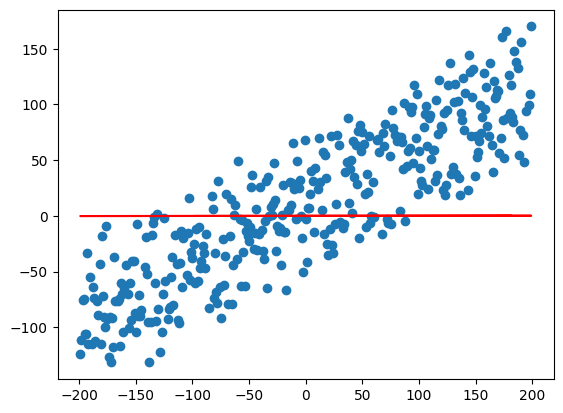

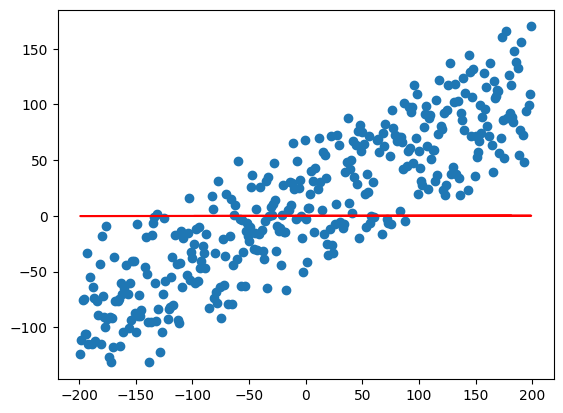

In [61]:
# Visualize the intermediate trained model
# epoch을 nums로 나누어 시각화
nums = 10

epochs_list = [round(epochs / (nums-1) * n+1) for n in range(nums)]

for i in range(len(epochs_list)):
    plt.scatter(X_train, y_train)   # scatter the original data

    # Load trained weights in specific epoch
    epoch = epochs_list[i] - 1   # In python, all indexes start from 0

    print()
    if epoch >= 1000:
      epoch = 999

    w = w_list[epoch]
    b = b_list[epoch]

    y_pred = w * X_train + b
    plt.plot(X_train, y_pred, color='red')
    plt.show()

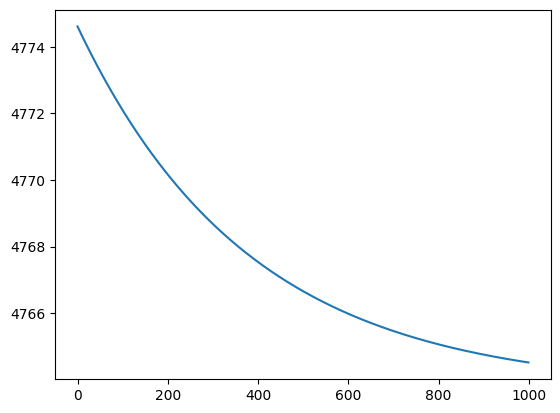

In [46]:
# Visualize the change of loss
plt.plot(loss_list)
plt.show()

### 평가 데이터에 대한 예측 결과는 다음과 같음

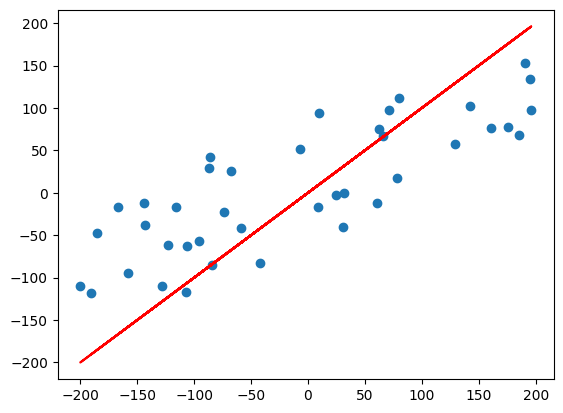

In [49]:
# Visualize the trained linear regression model
# scatter the original data
plt.scatter(X_test, y_test)

# plot prediction results
y_pred = X_test + b

plt.plot(X_test, y_pred, color='red')
plt.show()

### 학습된 선형 회귀 모델의 성능은 평가 데이터셋에 대한 손실임

In [50]:
test_loss = np.mean((y_test - y_pred)**2)
print('Test Loss for LinearRegression model : %.4f' % test_loss)

Test Loss for LinearRegression model : 5739.2389


## [P.3] <font color=red>sklearn</font> 라이브러리의 `LinearRegression` 모델을 활용해, 최적의 선형 회귀 모델 찾기

- 이 모듈은 경사하강법 대신 최소제곱법(Least Squares Method)를 사용해 모델 학습

In [51]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

In [52]:
X.shape # 1차원

(400,)

In [54]:
def lr_sklearn(X, y):
    X_2d = X.reshape(X.shape[0], -1) # 2차원으로 변환

    reg = LinearRegression().fit(X_2d, y)

    w = reg.coef_
    b = reg.intercept_

    print('Trained model weights : %.4f' % w)
    print('Trained model bias : %.4f' % b)

    return reg

In [55]:
model = lr_sklearn(X_train, y_train)

Trained model weights : 0.5210
Trained model bias : 9.9940


In [59]:
# get train loss
y_pred = model.predict(X_train.reshape(X_train.shape[0], -1))

train_loss = np.mean((y_train - y_pred)**2)
print('Train Loss for LinearRegression model : %.4f' % train_loss)

Train Loss for LinearRegression model : 1091.9456


### 평가 데이터에 대한 예측 결과는 다음과 같이 시각화

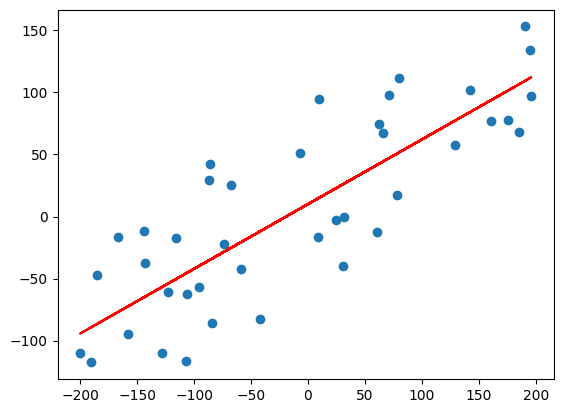

In [65]:
# Visualize the trained linear regression model
# scatter the original data
plt.scatter(X_test, y_test)

# plot prediction results
y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

plt.plot(X_test, y_pred, color='red')
plt.show()

In [66]:
# get test loss
test_loss = np.mean((y_test - y_pred)**2)
print('Test Loss for LinearRegression model : %.4f' % test_loss)

Test Loss for LinearRegression model : 1834.5224


## [P.4] <font color=red>sklearn</font> 라이브러리의 `SGDRegression` 모델을 활용해, 최적의 선형 회귀 모델 찾기

- 이 모듈은 경사하강법을 사용해 모델 학습

In [82]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
from sklearn.linear_model import SGDRegressor

In [83]:
def gd_sklearn(X, y, epochs, lr, alpha):
    X_2d = X.reshape(X.shape[0], -1)

    reg = SGDRegressor(penalty='l2',
                       alpha=alpha,
                       max_iter=epochs,
                       tol=1e-3,
                       learning_rate='invscaling',
                       eta0=lr,
                       random_state=42)

    reg.fit(X_2d, y)

    w = reg.coef_
    b = reg.intercept_

    print('Trained model weights : %.4f' % w)
    print('Trained model bias : %.4f' % b)

    return reg

In [84]:
# training setting
epochs = 1000
lr = 1e-7
alpha = 0.001

model = gd_sklearn(X_train, y_train, epochs, lr, alpha)

Trained model weights : 0.5206
Trained model bias : 0.0048


In [85]:
# get train loss
y_pred = model.predict(X_train.reshape(X_train.shape[0], -1))

train_loss = np.mean((y_train - y_pred)**2)
print('Train Loss for LinearRegression model : %.4f' % train_loss)

Train Loss for LinearRegression model : 1191.7376


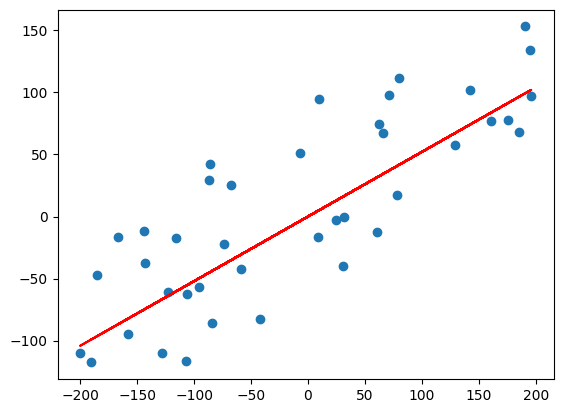

In [86]:
# Visualize the trained linear regression model
# scatter the original data
plt.scatter(X_test, y_test)

# plot prediction results
y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

plt.plot(X_test, y_pred, color='red')
plt.show()

In [87]:
# get test loss
test_loss = np.mean((y_test - y_pred)**2)
print('Test Loss for LinearRegression model : %.4f' % test_loss)

Test Loss for LinearRegression model : 1964.0238


`sklearn` 라이브러리를 사용하면, 별도의 gradient 계산 없이 모델을 쉽게 학습시킬 수 있음